In [1]:
import torch
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader
import os
import sys
import re
project_root = os.path.dirname(os.path.dirname(os.path.abspath('Pheno.ipynb')))
src_path = os.path.join(project_root, 'src')
sys.path.append(src_path)
plt.style.use('default')
%load_ext autoreload 
%autoreload 2

In [2]:
n_input = 1000
n_hidden = 128
n_latent = 32
n_labels = 2
batch_size = 32
n_epoch = 100

In [13]:
from model import BulkVAE
from dataset import TCGADataset, collate_fn
model = torch.load('../model.pth')
target_label = 'early_stage'
# train_dataset = TCGADataset('../data/Cleaned_data/Colon/train_exp.csv', '../data/Cleaned_data/Colon/train_label.csv', target_label)
# test_dateset = TCGADataset('../data/Cleaned_data/Colon/test_exp.csv', '../data/Cleaned_data/Colon/test_label.csv', target_label)

# target_label = 'sample_type'
train_dataset = TCGADataset('../data/Cleaned_data/Liver/train_exp.csv', '../data/Cleaned_data/Liver/train_label.csv', target_label)
test_dateset = TCGADataset('../data/Cleaned_data/Liver/test_exp.csv', '../data/Cleaned_data/Liver/test_label.csv', target_label)


/tmp/ipykernel_25344/2488096332.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('../model.pth')


In [14]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dateset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

In [15]:
total_latent = []
total_train = []
target_label = []
batch_id = []
for batch in train_loader:
    data_batch, target_batch, batch_index, mean, variance= batch
    latent = model.get_latents(data_batch)
    total_latent.append(latent)
    batch_id.append(batch_index)
    target_label.append(target_batch)
    total_train.append(data_batch)
# for batch in test_loader:
#     data_batch, target_batch, batch_index, mean, variance = batch
#     latent = model.get_latents(data_batch)
#     total_latent.append(latent)
#     batch_id.append(batch_index)
#     target_label.append(target_batch)
#     total_train.append(data_batch)
total_latent = torch.cat(total_latent, dim=0)
total_train = torch.cat(total_train, dim=0)
batch_id = torch.cat(batch_id, dim=0).view(-1)
total_latent = total_latent.detach().numpy()
target_label = torch.cat(target_label, dim=0)
total_latent.shape

(315, 32)

In [16]:
print(target_label)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,

/tmp/ipykernel_25344/1085689600.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_2d[target_label == i, 0], X_2d[target_label == i, 1], c=c, label=label)


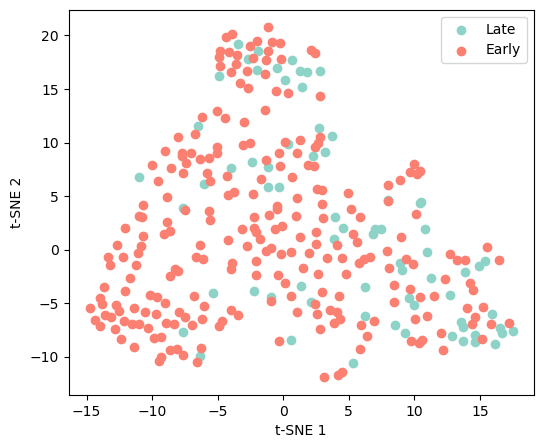

In [17]:

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(total_latent)
# X_2d = PCA(n_components=2).fit_transform(total_latent)
target_ids = range(20)
plt.figure(figsize=(6, 5))
# ['Normal', 'Tumor']
# colors = plt.cm.tab20(np.linspace(0, 1, len(target_ids)))
colors = plt.cm.Set3(np.linspace(0, 5, len(target_ids)))

for i, c, label in zip(target_ids, colors, ['Late', 'Early']):
    plt.scatter(X_2d[target_label == i, 0], X_2d[target_label == i, 1], c=c, label=label)
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.legend()
plt.show()


/tmp/ipykernel_25344/2419960861.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_2d[target_label == i, 0], X_2d[target_label == i, 1], c=c, label=label)


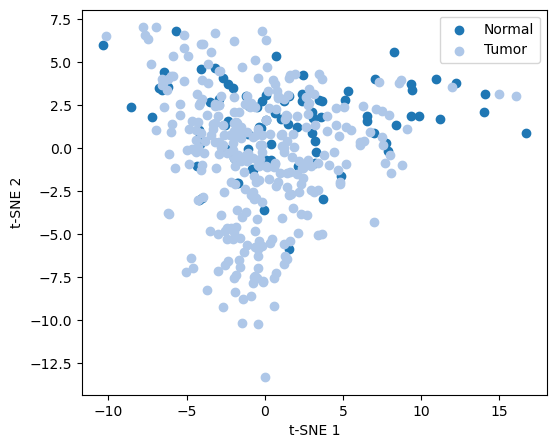

In [8]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
tsne = TSNE(n_components=2, random_state=0)
# X_2d = tsne.fit_transform(total_latent)
X_2d = PCA(n_components=2).fit_transform(total_latent)
target_ids = range(20)
plt.figure(figsize=(6, 5))
# ['Normal', 'Tumor']
colors = plt.cm.tab20(np.linspace(0, 1, len(target_ids)))

for i, c, label in zip(target_ids, colors, ['Normal', 'Tumor']):
    plt.scatter(X_2d[target_label == i, 0], X_2d[target_label == i, 1], c=c, label=label)
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.legend()
plt.show()


/tmp/ipykernel_25344/1410971327.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_2d[target_label == i, 0], X_2d[target_label == i, 1], c=c, label=label)


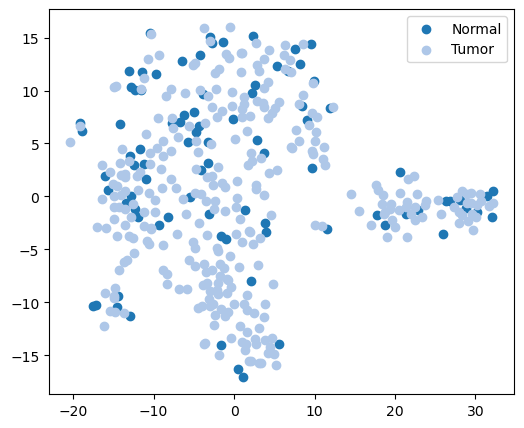

In [9]:

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(total_train)
# X_2d = PCA(n_components=2).fit_transform(total_latent)
target_ids = range(20)
plt.figure(figsize=(6, 5))
# ['Normal', 'Tumor']
colors = plt.cm.tab20(np.linspace(0, 1, len(target_ids)))

for i, c, label in zip(target_ids, colors, ['Normal', 'Tumor']):
    plt.scatter(X_2d[target_label == i, 0], X_2d[target_label == i, 1], c=c, label=label)
    plt.legend()
plt.show()


/tmp/ipykernel_25344/3886187603.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_2d[batch_id == i, 0], X_2d[batch_id == i, 1], c=c, label=label)


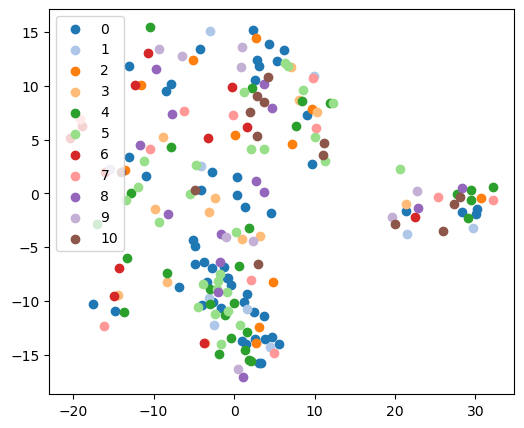

In [10]:

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(total_train)
# X_2d = PCA(n_components=2).fit_transform(total_latent)
target_ids = range(20)
plt.figure(figsize=(6, 5))
# ['Normal', 'Tumor']
colors = plt.cm.tab20(np.linspace(0, 1, len(target_ids)))

for i, c, label in zip(target_ids, colors, range(20)):
    if i > 10:
        break
    plt.scatter(X_2d[batch_id == i, 0], X_2d[batch_id == i, 1], c=c, label=label)
    plt.legend()
plt.show()

